# Beispiel Orthogonalisierungsverfahren

nach Erhard Schmidt

In [1]:
import numpy as np
from sympy import symbols, integrate, lambdify
import matplotlib.pyplot as plt
from IPython.display import Math, display

Der Raum der quadratisch integrierbaren (nach Lebesgues) Funktionen $L_2[-1,1]$ ist mit dem Skalarprodukt

$$(x,y) = \int_{-1}^{1} x(t) y(t) dt$$
und der induzierten Norm

$$\|x\|_2 = \sqrt{(x,x)}$$
ein Hilbertraum. Wir definieren daher das Skalarprodukt (dot-product) und die norm wie folgt:

In [2]:
t = symbols('t')
def dot(x,y):
    return integrate(x*y,(t,-1,1))
def norm(x):
    return dot(x,x)**(1/2)

Wir betrachten die Folge $\{t^n\}_{n\in\mathbb{N}}\subset L^2[-1,1]$ von Monomen:

In [3]:
yi = [t**i for i in range(5)]
yi

[1, t, t**2, t**3, t**4]

Die Monome sind nicht orthogonal, jedoch linear unabhängig. Falls dem so wäre müsste eine Diagonalmatrix entstehen:

In [4]:
m = [[dot(yi[i],yi[j]) for j in range(5)] for i in range(5)]
m

[[2, 0, 2/3, 0, 2/5],
 [0, 2/3, 0, 2/5, 0],
 [2/3, 0, 2/5, 0, 2/7],
 [0, 2/5, 0, 2/7, 0],
 [2/5, 0, 2/7, 0, 2/9]]

Wir berechnen nun ein orthonormales System, basierend auf den Monomen nach dem Verfahren von Schmidt:

In [5]:
xi = [yi[0]/norm(yi[0])]
for i in range(1,5):
    zi=yi[i]-np.sum([dot(yi[i],xi[j])*xi[j] for j in range(i)])
    xi.append(zi/norm(zi))

Das Orthonormalsystem ist damit gegeben durch:

In [6]:
for xii in xi:
    display(xii)

0.707106781186547

1.22474487139159*t

2.37170824512628*t**2 - 0.790569415042095

4.67707173346743*t**3 - 2.80624304008046*t

9.2807765030735*t**4 - 7.95495128834872*t**2 + 0.795495128834872

Test des Orthonormalsystems ergibt die Einheitsmatrix:

In [7]:
m = [[dot(xi[i],xi[j]) for j in range(5)] for i in range(5)]
np.round(np.array(m,dtype=float),8)

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  0.,  1.]])

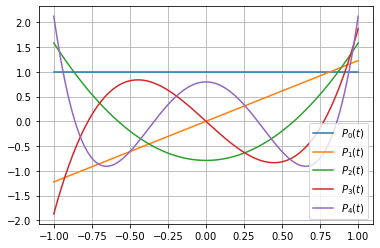

In [8]:
tp = np.linspace(-1,1,400)
n = 0
plt.plot(tp,np.ones_like(tp),label='$P_'+str(n)+'(t)$')
for xii in xi[1:]:
    n += 1
    f = lambdify(t,xii,'numpy')
    plt.plot(tp, f(tp),label='$P_'+str(n)+'(t)$')
plt.grid()
plt.legend()
plt.show()

Das Resultat sind bezüglich der $L_2$-Norm normierte Legendre'sche Polynome. Üblicher weise werden die Polynome mit $P_n(1) = 1$ normiert:

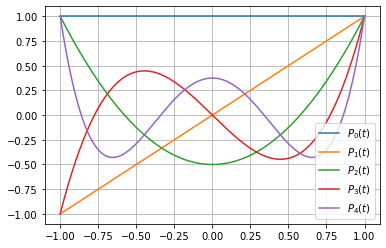

In [9]:
tp = np.linspace(-1,1,400)
n = 0
plt.plot(tp,np.ones_like(tp),label='$P_'+str(n)+'(t)$')
for xii in xi[1:]:
    n += 1
    f = lambdify(t,xii,'numpy')
    plt.plot(tp, f(tp)/f(1),label='$P_'+str(n)+'(t)$')
plt.grid()
plt.legend()
plt.show()

Die ersten fünf Legendre'sche Polynome sind gegeben durch:

In [10]:
lp = [xii/xii.subs(t,1) for xii in xi]
for lpi in lp:
    display(lpi)

1.00000000000000

1.0*t

1.5*t**2 - 0.5

2.5*t**3 - 1.5*t

4.375*t**4 - 3.75*t**2 + 0.375